# Peterside Hospital Data Analysis for Heart Disease Predictions

This project aims at analysing the data obtained from the Hospital to train a Machine Learning model for the prediction of Heart Disease based on the case file analysis of historical data using Supervised Machine Learning.

The Dataset for the project is attached as a separate file

## Notebook Content
1. Step 1: Install + Import Neccessary Libraries
2. Step 2: Reading + Exploring the Data
3. Step 3: Data Cleaning + Preprocessing
4. Step 4: Data Analysis + Visualization
5. Step 5: Model Training + Deployment
6. Step 6: Data Analysis and Results

## Step 1: Install + Import Neccessary Libraries

In [1]:
# Importing neccessary Libraries

#For Data Analysis
import pandas as pd
import numpy as ny

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip Install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# for seaborn

sns.set_style('darkgrid')
plt.style.use('bmh')

In [3]:
#!pip install xgboost

## Step 2: Reading + Exploring the Data

In [4]:
# Load the Dataset

df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Step 3: Data Cleaning + Preprocessing

In [6]:
# Renaming the Columns with more relatable names for ease of understanding

df.columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_hearth_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessel', 'thalassemia', 'target']

In [7]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_hearth_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_hearth_rate          303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessel         303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

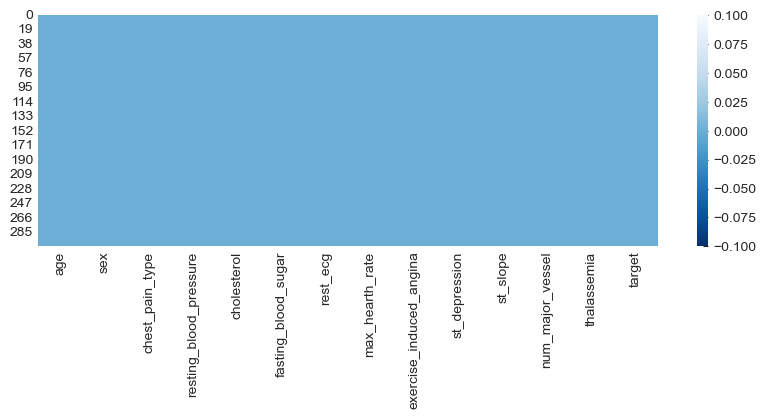

In [8]:
# Checking for missing value in the dataset

df.isnull().sum()

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

In [9]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
rest_ecg,0
max_hearth_rate,0
exercise_induced_angina,0


## Step 4: Data Analysis + Visualization

### Univariate Analysis

In [9]:
#Check for Outliners

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_hearth_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessel', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='max_hearth_rate'>

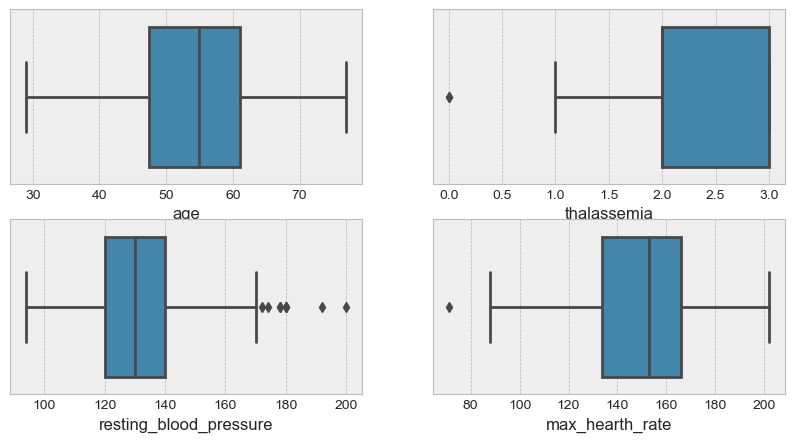

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

sns.boxplot(x='age', data=df, ax=axs[0,0])

sns.boxplot(x='thalassemia', data=df, ax=axs[0,1])

sns.boxplot(x='resting_blood_pressure', data=df, ax=axs[1,0])

sns.boxplot(x='max_hearth_rate', data=df, ax=axs[1,1])

### Insight:

Outliners are observed in 'resting_blood_pressure', 'Cholesterol', and 'thalassemia' these will need to be treated when developing the model for machine learning

In [11]:
df[['age']]

,age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


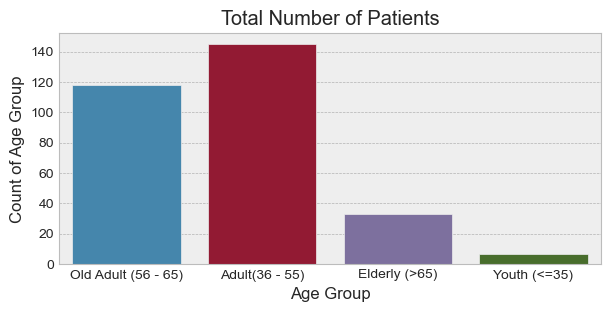

In [21]:
# Grouping the patient into Age Categories to help with analysis


def age_bracket(age):
    if age <= 35:
        return "Youth (<=35)"
    elif age <= 55:
        return "Adult(36 - 55)"
    elif age <= 65:
        return "Old Adult (56 - 65)"
    else:
        return "Elderly (>65)"

df["age_bracket"]= df['age'].apply(age_bracket)

#Investigating the age group

plt.figure(figsize=(7,3))
sns.countplot(x='age_bracket', data=df);
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

### Insight:

The Analysis shows that the Adult and the Old Adult constitute the majority of the Patients with record for the investigation and model development

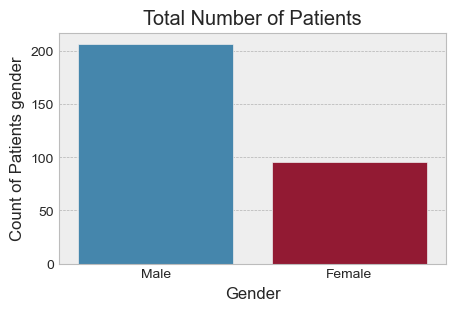

In [25]:
# Inspect the Gender distribution of patient

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df["Gender"]= df['sex'].apply(gender)

#Investigating the age group

plt.figure(figsize=(5,3))
sns.countplot(x='Gender', data=df);
plt.xlabel("Gender")
plt.ylabel("Count of Patients gender")
plt.title("Total Number of Patients");

### Insight:

The Analysis shows that more male patient are recorded to the tune of over 2 times the total number of female patients

In [15]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_hearth_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessel', 'thalassemia', 'target', 'age_bracket', 'Gender'],
      dtype='object')

### 4.1 Converting Numeric data to String for Analysis and Visualization

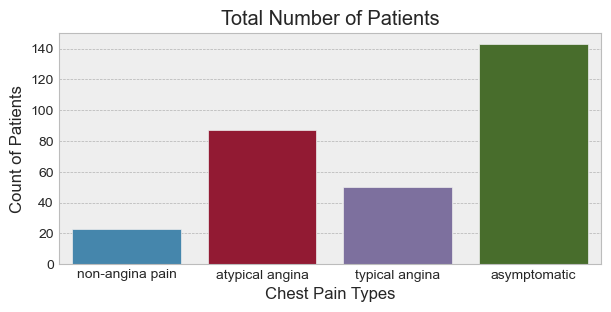

In [14]:
#Converting Chest-pain type to String for analysis and Visualization

def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-angina pain"
    else:
        return "asymptomatic"

df["cp_cat"]= df['chest_pain_type'].apply(chest_pain)

#Investigating the age group

plt.figure(figsize=(7,3))
sns.countplot(x='cp_cat', data=df);
plt.xlabel("Chest Pain Types")
plt.ylabel("Count of Patients")
plt.title("Total Number of Patients");

### Insight:

The Analysis shows that most chest pain recorded are 'Asymptomic' and next common is the 'Atypical Anglia', with 'Non-Anglia pain' the least recorded

In [15]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_hearth_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target,age_bracket,Gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (56 - 65),Male,non-angina pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(36 - 55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(36 - 55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (56 - 65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (56 - 65),Female,asymptomatic


Yes    165
No     138
Name: Label, dtype: int64


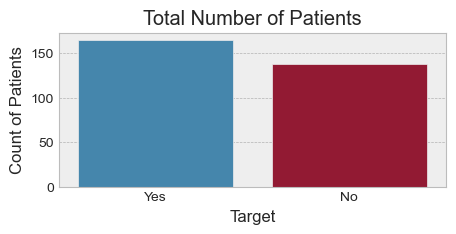

In [31]:

#Setting the Target - have disease or not(1= yes, 0=n0) for Visualization

def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"

df["Label"]= df['target'].apply(label)

#Total patients in each categoties

print(df['Label'].value_counts())

#Investigating the age group

plt.figure(figsize=(5,2))
sns.countplot(x='Label', data=df);
plt.xlabel("Target")
plt.ylabel("Count of Patients")
plt.title("Total Number of Patients");

### Insight:

The Analysis shows that higher percentage of the patient have heart decease 

### Bivariate Analysis

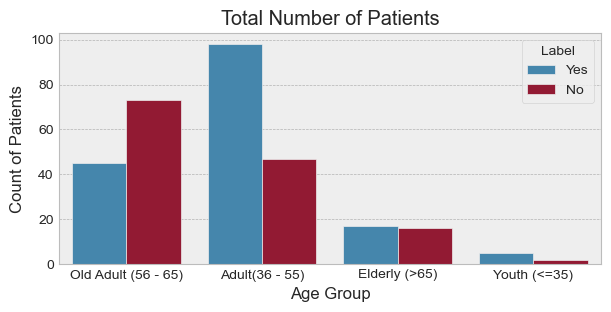

In [18]:
#Investigating the Age group of patients by the target feature

plt.figure(figsize=(7,3))
sns.countplot(x='age_bracket', data=df, hue='Label')
plt.xlabel('Age Group')
plt.ylabel('Count of Patients')
plt.title ('Total Number of Patients');

### Insight:

The 'Old Adult' age group is the only one with lower percentage of patient with Heart decease in relative to the total number of recoreded patients

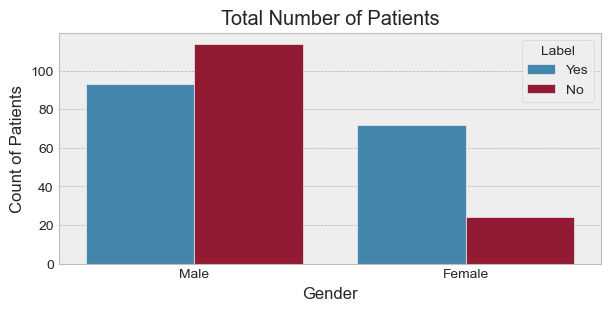

In [20]:
#Investigating the Gender of patients by the target feature

plt.figure(figsize=(7,3))
sns.countplot(x='Gender', data=df, hue='Label')
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.title ('Total Number of Patients');

### Insight:

The Gender distribution shows that most male patients are without heart desease contrary to the female patients

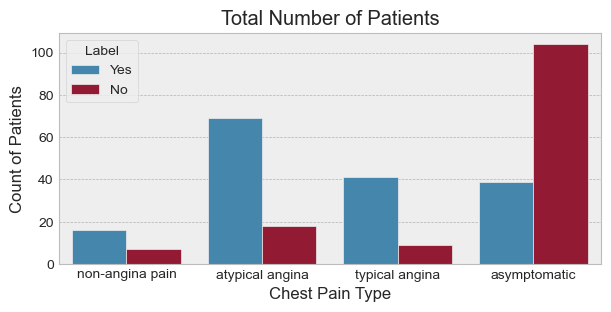

In [21]:
#Investigating the Gender of patients by the target feature

plt.figure(figsize=(7,3))
sns.countplot(x='cp_cat', data=df, hue='Label')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count of Patients')
plt.title ('Total Number of Patients');

### Insight:

The Analysis shows that higher percentage of patients with 'Asymptomatic' type of Chest pain are without Heat desease compared to the other type of chest pain.

### Exploratory Data Analysis - Multivariate Analysis

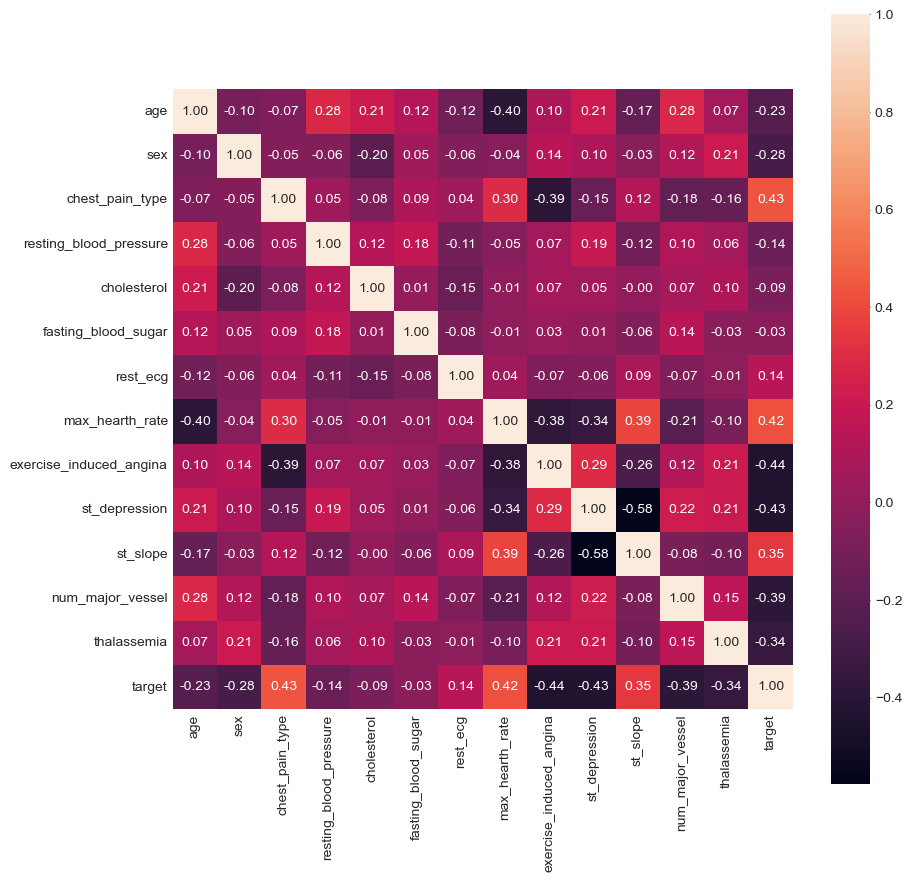

In [22]:
#Correlation between all variables in the dataset

plt.figure(figsize=(10,10))

hm=sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

## Feature Engineering Data Pre-Processing

In [33]:
#Create a copy of the data (Exclude target/label alongside other columns that were created)

df1=df[['age','sex','chest_pain_type', 'resting_blood_pressure', 'cholesterol','fasting_blood_sugar', 'rest_ecg', 'max_hearth_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessel', 'thalassemia']]

label=df[['target']]

In [34]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_hearth_rate              int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessel             int64
thalassemia                  int64
dtype: object

In [35]:
#Dealing with Outliners - 'resting_blood_pressure', 'Cholesterol', 'thalassemia'

#Normalize the data

scaler=MinMaxScaler()

df1["Scaled_RBP"]=scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1["Scaled_chol"]=scaler.fit_transform(df1['cholesterol'].values.reshape(-1, 1))
df1["Scaled_thal"]=scaler.fit_transform(df1['thalassemia'].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"]=scaler.fit_transform(df1['max_hearth_rate'].values.reshape(-1, 1))


df1.drop(['resting_blood_pressure','cholesterol','thalassemia','max_hearth_rate'], axis=1, inplace= True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessel,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Step 5: Model Training + Deployment

## Machine Learning

In [37]:
#Split the Dataset into training and testing sets

X_train, X_test, y_train, y_test=train_test_split(df1, label, test_size=0.2, random_state=42)

In [38]:
#Model Building 

#Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Accuracy: ', accuracy_score(y_test, ly_pred))
print('Precision: ', precision_score(y_test, ly_pred))
print('Recall: ', recall_score(y_test, ly_pred))
print('F1-Score: ', f1_score(y_test, ly_pred))

print('AUC-ROC: ', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy:  0.8524590163934426
Precision:  0.8709677419354839
Recall:  0.84375
F1-Score:  0.8571428571428571
AUC-ROC:  0.8529094827586207


In [39]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


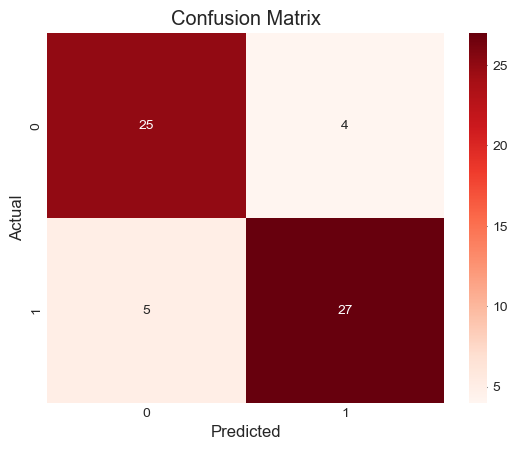

In [41]:
# Create a confusion matrix

lcm=confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Insight:

The Model With 'Logistic Regression' shows an Accuracy of 85% and Precision of 87% using 20% of the data obtained for the testing and the remaining 80% for model training

- 5 wrong prediction of patient with heart desease are reported not having heart decease which is vital in healthcare prediction.

- Other model need to be considered for better result 

In [58]:
# Model Building _ Random Forest

rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred=rfc.predict(X_test)

print("Random Forest")
print('Accuracy: ', accuracy_score(y_test, rfy_pred))
print('Precision: ', precision_score(y_test, rfy_pred))
print('Recall: ', recall_score(y_test, rfy_pred))
print('F1-Score: ', f1_score(y_test, rfy_pred))

print('AUC-ROC: ', roc_auc_score(y_test, rfy_pred))

Random Forest
Accuracy:  0.8524590163934426
Precision:  0.8484848484848485
Recall:  0.875
F1-Score:  0.8615384615384615
AUC-ROC:  0.8512931034482758


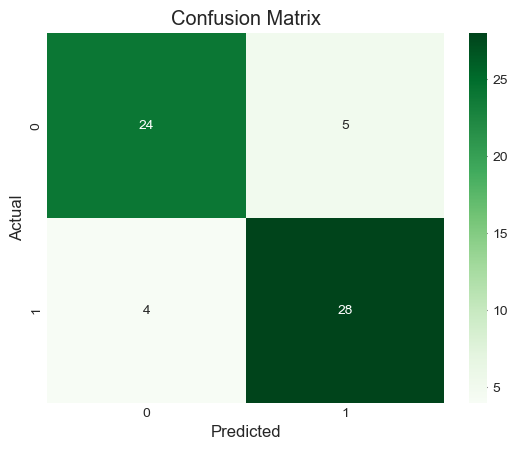

In [53]:
# Create a confusion matrix

rcm=confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Insight:

The Model With 'Random Forest' shows an Accuracy of 85% and Precision of 85% using 20% of the data obtained for the testing and the remaining 80% for model training

- 4 wrong prediction of patient with heart desease are reported not having heart decease which is vital in healthcare prediction.

- Other model will be investigated to compare result 

## Step 6: Data Analysis and Results

Deploying 8 different Machine Learning Algorithms to compare the result and obtain deplorable insight for the model

In [44]:
#8 Machine Learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(),'XGB Classifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbours'],
              [SGDClassifier(),'SGD Classifier'], [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'], [DecisionTreeClassifier(random_state = 42), 'Decision'],
              [LogisticRegression(), 'Logistic Regression']]

In [45]:
classifiers[0][0]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list ={}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score= roc_auc_score(y_test,pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print ("")
        

In [47]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTree

In [48]:
#Print accuracy score

print ("Accuracy Score")
x = pd.DataFrame(acc_list)
x

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision,Logistic Regression
0,81.97%,81.97%,75.41%,77.05%,65.57%,86.89%,85.25%,85.25%


In [49]:
print ("Precision Score")
x2 = pd.DataFrame(precision_list)
x2

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision,Logistic Regression
0,86.21%,83.87%,79.31%,70.45%,65.71%,90.0%,92.59%,87.1%


In [50]:
print ("Recall Score")
x3 = pd.DataFrame(recall_list)
x3

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision,Logistic Regression
0,78.12%,81.25%,71.88%,96.88%,71.88%,84.38%,78.12%,84.38%


In [51]:
print ("ROC Score")
x4 = pd.DataFrame(roc_list)
x4

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision,Logistic Regression
0,82.17%,82.0%,75.59%,76.02%,65.25%,87.02%,85.61%,85.29%


In [55]:
# Model Building _ Naive Bayes

nb=GaussianNB()
nb.fit(X_train, y_train)
nby_pred=nb.predict(X_test)

print("Random Forest")
print('Accuracy: ', accuracy_score(y_test, nby_pred))
print('Precision: ', precision_score(y_test, nby_pred))
print('Recall: ', recall_score(y_test, nby_pred))
print('F1-Score: ', f1_score(y_test, nby_pred))

print('AUC-ROC: ', roc_auc_score(y_test, nby_pred))

Random Forest
Accuracy:  0.8688524590163934
Precision:  0.9
Recall:  0.84375
F1-Score:  0.870967741935484
AUC-ROC:  0.8701508620689655


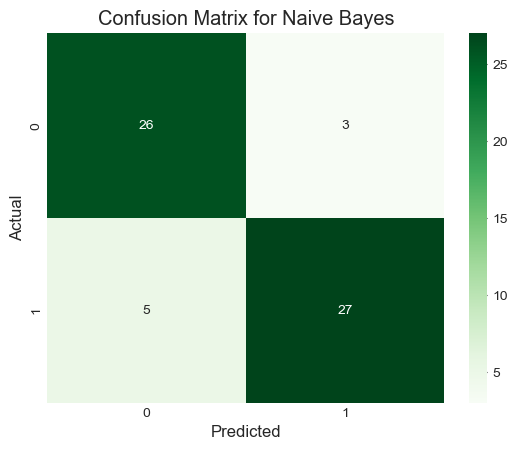

In [57]:
# Create a confusion matrix

ncm=confusion_matrix(y_test, nby_pred)

#Visualize the confusion matrix
sns.heatmap(ncm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()